# Download mnist dataset


In [1]:
import tensorflow as tf

import numpy as np

# Replace 'path/to/mnist.npz' with the actual path to your downloaded file
data = np.load('mnist.npz')

# Load the training and testing data
X_train, y_train = data['x_train'], data['y_train']
X_test, y_test = data['x_test'], data['y_test']

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


# Explore the mnist dataset

In [2]:
X_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_test.shape

(10000,)

# Visulise the dataset

In [6]:
#Import matplotlib
import matplotlib.pyplot as plt

In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
#Import seaborn
import seaborn as sns

In [9]:
#Select the font scale
sns.set(font_scale=2)

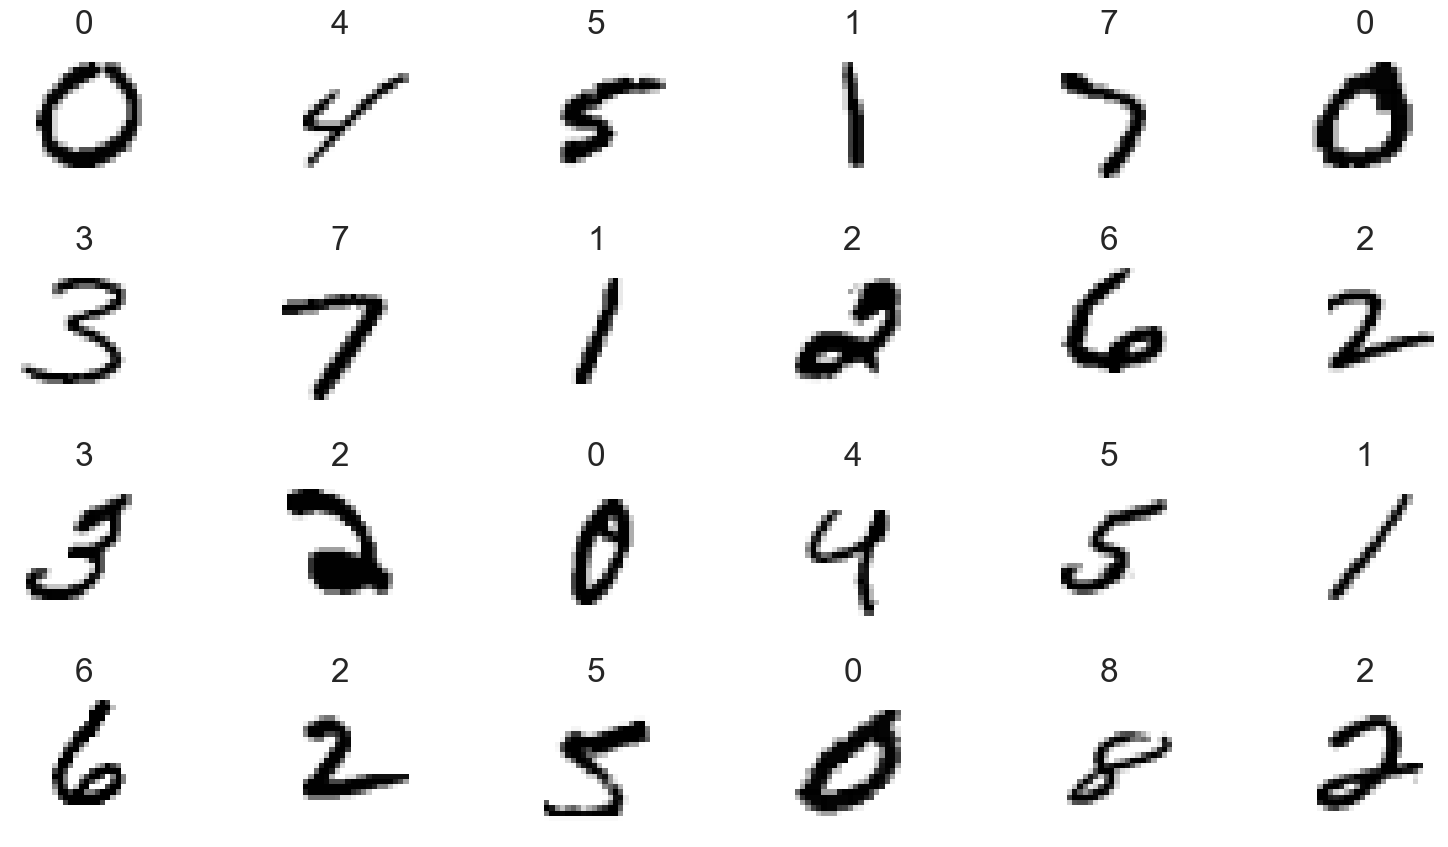

In [10]:
#Run this snippet multiple times to see additional randomly selected digits.
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()


# Data Preparation
## Reshaping the Image Data

In [11]:
#CNN require images to be in the shape (width, height, channels)
#Reshape the X_train dataset
#Why channels is 1 in this case, answer using another # line
X_train = X_train.reshape((60000, 28, 28, 1))

In [12]:
#Check the shape now, what has changed
X_train.shape

(60000, 28, 28, 1)

In [13]:
#Now do the same for X_test
X_test = X_test.reshape((10000, 28, 28, 1))

In [14]:
#Check the shape now
X_test.shape

(10000, 28, 28, 1)

# Normalizing the Image Data

In [15]:
#Do you still remember what is normalisation?
#Write it here
#Now normalise the X_train
X_train = X_train.astype('float32') / 255

In [16]:
#Do the same for X_test
X_test = X_test.astype('float32') / 255

# One-Hot Encoding: Converting the Labels From Integers to Categorical Data

In [17]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
y_test = to_categorical(y_test)
y_test.shape
#Explain what has changed and why using a new # line

(10000, 10)

# Creating the Neural Network

In [20]:
#Import sequential from keras models
from tensorflow.keras.models import Sequential
cnn = Sequential()

# Adding Layers to the Network

In [21]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

# Adding a Convolution Layer

In [22]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
#Define activation function?

# Dimensionality of the First Convolution Layer’s Output

# Adding a Pooling Layer

In [23]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))
#What is max pooling techanique and why it is used?

# Adding Another Convolutional Layer and Pooling Layer

In [24]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the Results

In [25]:
cnn.add(Flatten())

# Adding a Dense Layer to Reduce the Number of Features

In [26]:
cnn.add(Dense(units=128, activation='relu'))

# Adding Another Dense Layer to Produce the Final Output

In [27]:
cnn.add(Dense(units=10, activation='softmax'))

# Printing the Model’s Summary

In [28]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

# Visualizing a Model’s Structure

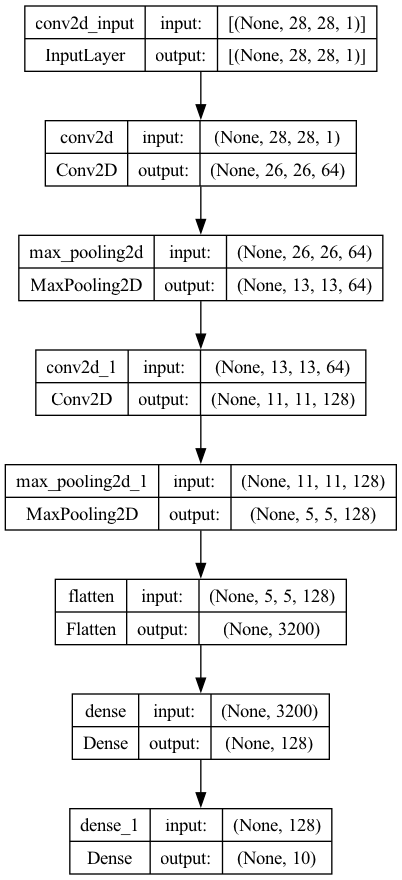

In [29]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
            show_layer_names=True)
Image(filename='convnet.png')

# Compiling the Model

In [30]:
cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


# Training and Evaluating the Model

In [31]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64,
              validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 17s 20ms/step - loss: 0.1402 - accuracy: 0.9570 - val_loss: 0.0440 - val_accuracy: 0.9877
Epoch 2/5
844/844 [==============================] - 17s 20ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0447 - val_accuracy: 0.9875
Epoch 3/5
844/844 [==============================] - 17s 21ms/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.0463 - val_accuracy: 0.9872
Epoch 4/5
844/844 [==============================] - 18s 21ms/step - loss: 0.0191 - accuracy: 0.9938 - val_loss: 0.0383 - val_accuracy: 0.9892
Epoch 5/5
844/844 [==============================] - 18s 22ms/step - loss: 0.0161 - accuracy: 0.9951 - val_loss: 0.0379 - val_accuracy: 0.9907


# Evaluating the Model

In [32]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0312 - accuracy: 0.9903


In [33]:
loss

0.031214065849781036

In [34]:
accuracy

0.9902999997138977

# Making Predictions

In [35]:
predictions = cnn.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [36]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [37]:
for index, probability in enumerate(predictions[0]):
          print(f'{index}: {probability:.10%}')

0: 0.0000000516%
1: 0.0000001729%
2: 0.0000237674%
3: 0.0000074592%
4: 0.0000000000%
5: 0.0000000016%
6: 0.0000000000%
7: 99.9999642372%
8: 0.0000000398%
9: 0.0000013198%


# Locating the Incorrect Predictions

In [38]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [39]:
len(incorrect_predictions)

97

# Visualizing Incorrect Predictions

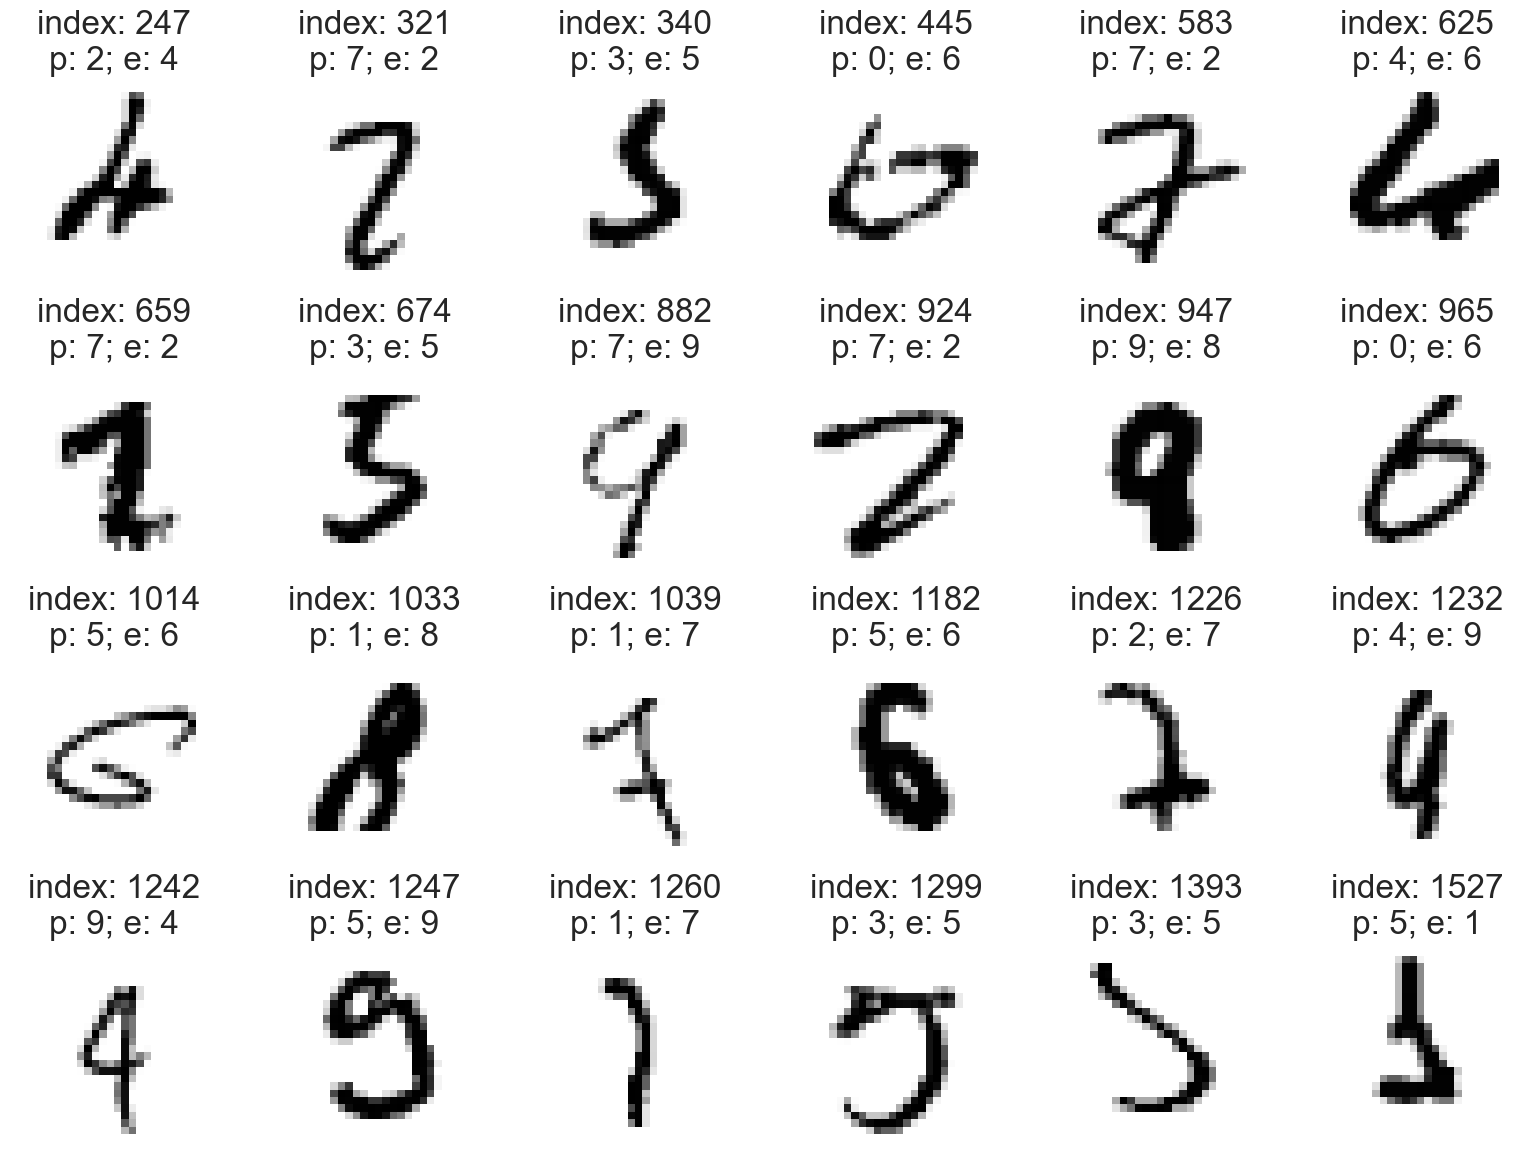

In [40]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(
        f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

# Displaying the Probabilities for Several Incorrect Predictions

In [41]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')


In [42]:
display_probabilities(predictions[495])

0: 0.0880251173%
1: 0.0000499083%
2: 1.1152468622%
3: 0.1545468112%
4: 0.0004156775%
5: 0.0531767902%
6: 2.2038165480%
7: 0.0000007450%
8: 96.3781952858%
9: 0.0065229040%


In [43]:
display_probabilities(predictions[583])

0: 0.0000002370%
1: 0.0000849965%
2: 27.8621017933%
3: 0.0316099176%
4: 0.0000000013%
5: 0.0000000003%
6: 0.0000000009%
7: 72.0984160900%
8: 0.0077885707%
9: 0.0000021401%


# Saving and Loading a Model

In [44]:
#Save the model in a directory
!mkdir -p saved_model
cnn.save('saved_model/mnist_cnn.h5')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/model.h5



mnist_cnn.h5
ls: saved_model/model.h5: No such file or directory


In [46]:
# Load the model
from tensorflow.keras.models import load_model
cnn = load_model('saved_model/mnist_cnn.h5')
# Check its architecture
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4